In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def simpson(f,a,b,N):
    '''
    Approximate the definite integral of f(x) from a to b by the Simpson's rule,
    using N subintervals, N must be even integral.
    '''
    if N%2 == 0:
        n = N
    else:
        n = N + 1
    h = (b-a)/n
    S = f(a)
    for i in range(1,n,2):
        x = a+h*i
        S += 4*f(x)
    for i in range(2,n-1,2):
        x = a+h*i
        S += 2*f(x)
    S += f(b)
    S = h*S/3
    
    return S

In [15]:
def recursive_simpson(f,a,b,S,tol):
    '''
    Recursive implement of adaptive Simspon's rule
    f:function of f(x)
    [a,b] : the interval of integration
    S : previous
    tol : the tolerance
    
    This is a subfunction of adapt_simpson
    '''
    c = (a+b)/2
    SL = simpson(f,a,c,1)
    SR = simpson(f,c,b,1)
    Sn = SL + SR
    err = abs(Sn-S)/15
    if err<tol:
        S = Sn
        nodes = [a,c,b]
        return S, err, nodes
    else:
        SL, err1, nodes1 = recursive_simpson(f,a,c,SL,tol/2)
        SR, err2, nodes2 = recursive_simpson(f,c,b,SR,tol/2)
        S=SL+SR
        err = err1 + err2
        nodes = nodes1[0:-1]
        nodes.extend(nodes2)
    
    return SL+SR,err,nodes

In [30]:
def adapt_simpson(f,a,b,tol=10**-9):
    S = simpson(f,a,b,1)
    S, err, nodes = recursive_simpson(f,a,b,S,tol)
    return S, err, nodes

In [31]:
def f(x):
    return 400*x*(1-x)*exp(-2*x)

In [32]:
S, err, nodes = adapt_simpson(lambda x:f(x), 0, 2*np.pi, 10**-1)

In [33]:
print(S, err)

0.02751150106175304 0.033450829934616136


In [27]:
len(nodes)

11

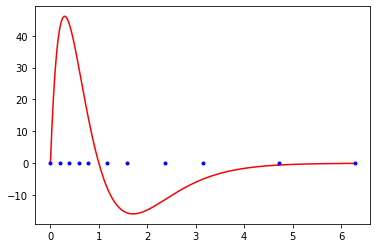

In [37]:
x = np.linspace(0,2*np.pi,200)
y = f(x)
x1 = np.array(nodes)
y1 = np.zeros(len(x1))
plot(x,y,'r',x1,y1,'b.')